In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plot
import numpy as np
import math
import numpy as np

In [71]:
import pandas as pd
data = pd.read_csv('housing.csv')

In [72]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [73]:
dataset = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]

In [74]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [75]:
dataset1 = dataset[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]

In [76]:
op_dummies = pd.get_dummies(dataset['ocean_proximity'])

In [77]:
dataset1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [78]:
y = data.iloc[:, 8].values

In [79]:
sc = StandardScaler()
sc.fit(dataset1)

StandardScaler()

In [80]:
X_std = sc.transform(dataset1)
X_std_df = pd.DataFrame(data=X_std, columns=dataset1.columns)

In [81]:
X_std_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881
...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583


In [82]:
X = pd.concat([X_std_df, op_dummies], axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,0,1,0,0,0


In [92]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,0,1,0,0,0


In [96]:
X.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [101]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(X, y)

y_pred = svm_reg.predict(X)
rms = np.sqrt(mean_squared_error(y, y_pred))
print(rms)

109713.19833753529


In [108]:
from sklearn.svm import SVR

for i in ('linear', 'rbf', 'poly'):
  model = SVR(kernel = i, C=100, gamma=0.1, epsilon=.1)
  model.fit(X, y)
  relation_square = model.score(X, y)
  y_pred = model.predict(X)
  rms = np.sqrt(mean_squared_error(y, y_pred))
  print('R-square : ', relation_square*relation_square, ', RMS :', rms)


R-square :  0.38403460697823577 , RMS : 71160.49308643541
R-square :  0.14310958279280153 , RMS : 90985.00547547768
R-square :  0.06343638445094262 , RMS : 99808.73258104688


In [109]:
from sklearn.svm import SVR

for i in ('linear', 'rbf', 'poly'):
  model = SVR(kernel = i, C=100, gamma=0.2, epsilon=.1)
  model.fit(X, y)
  relation_square = model.score(X, y)
  y_pred = model.predict(X)
  rms = np.sqrt(mean_squared_error(y, y_pred))
  print('R-square : ', relation_square*relation_square, ', RMS :', rms)

R-square :  0.38403460697823577 , RMS : 71160.49308643541
R-square :  0.10127246124289657 , RMS : 95278.88514055722
R-square :  0.2082710211783259 , RMS : 85080.80970807801


In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   5.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.5s
[CV] END ..............................C=30.0, kernel=linear; total time=   5.4s
[CV] END .............................C=100.0, kernel=linear; total time=   5.2s
[CV] END .............................C=100.0, 

[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.6s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.5s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.5s
[CV] END .....................C=10.0, gamma=0.01, kernel=rbf; total time=  10.5s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.4s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.6s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.6s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.5s
[CV] END .....................C=10.0, gamma=0.03, kernel=rbf; total time=  10.5s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  10.3s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  10.4s
[CV] END ......................C=10.0, gamma=0.1, kernel=rbf; total time=  10.4s
[CV] END ...................

[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  10.1s
[CV] END .....................C=300.0, gamma=0.1, kernel=rbf; total time=  10.1s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.0s
[CV] END .....................C=300.0, gamma=0.3, kernel=rbf; total time=  10.1s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   9.9s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=  10.0s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   9.9s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   9.8s
[CV] END .....................C=300.0, gamma=1.0, kernel=rbf; total time=   9.9s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [113]:
grid_search.best_estimator_

SVR(C=300.0, kernel='linear')

In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA57EABFA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EA57E787C0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [115]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=3, n_estimators=88, random_state=42)

In [116]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

74143.05949879924 {'max_features': 7, 'n_estimators': 180}
74123.74198111074 {'max_features': 5, 'n_estimators': 15}
71850.69422863358 {'max_features': 3, 'n_estimators': 72}
73081.29677469515 {'max_features': 5, 'n_estimators': 21}
74048.50527371431 {'max_features': 7, 'n_estimators': 122}
71868.78819720293 {'max_features': 3, 'n_estimators': 75}
71503.16077965147 {'max_features': 3, 'n_estimators': 88}
71894.01967465405 {'max_features': 5, 'n_estimators': 100}
71759.62789100487 {'max_features': 3, 'n_estimators': 150}
95350.32559056558 {'max_features': 5, 'n_estimators': 2}


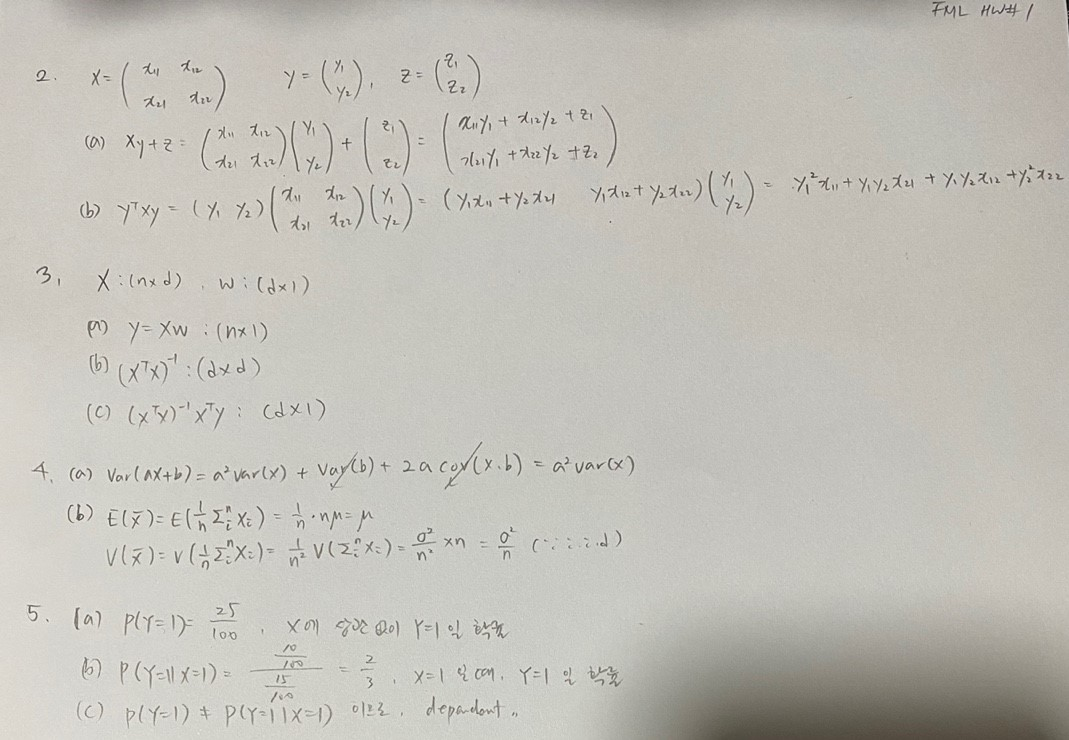

In [2]:
from IPython.display import Image
Image("w2.jpg")